In [229]:
# Core data manipulation and numerical libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn components
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN

# Hyperparameter optimization
import optuna

# Surrogate model 
import xgboost as xgb

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [230]:
df = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Typhoon Name             1776 non-null   object 
 1   Year                     1776 non-null   int64  
 2   Region                   1776 non-null   int64  
 3   Province                 1776 non-null   object 
 4   City/Municipality        1776 non-null   object 
 5   Families                 1776 non-null   int64  
 6   Person                   1776 non-null   int64  
 7   Brgy                     1776 non-null   int64  
 8   Dead                     1776 non-null   int64  
 9   Injured/Ill              1776 non-null   int64  
 10  Missing                  1776 non-null   int64  
 11  Totally                  1776 non-null   int64  
 12  Partially                1776 non-null   int64  
 13  Total                    1776 non-null   int64  
 14  Quantity                

In [232]:
df.isnull().sum()

Typhoon Name               0
Year                       0
Region                     0
Province                   0
City/Municipality          0
Families                   0
Person                     0
Brgy                       0
Dead                       0
Injured/Ill                0
Missing                    0
Totally                    0
Partially                  0
Total                      0
Quantity                   0
Cost                       0
Nearest_Station            0
Station_Province           0
Distance_km                0
PAR_START                  0
PAR_END                    0
Duration_in_PAR_Hours      0
Max_Sustained_Wind_kph     0
Typhoon_Type               0
Max_24hr_Rainfall_mm       0
Total_Storm_Rainfall_mm    0
Min_Pressure_hPa           0
Weather_Station_Mapped     0
Weather_Records_Found      0
Weather_Days_Covered       0
dtype: int64

In [233]:
df.columns

Index(['Typhoon Name', 'Year', 'Region', 'Province', 'City/Municipality',
       'Families', 'Person', 'Brgy', 'Dead', 'Injured/Ill', 'Missing',
       'Totally', 'Partially', 'Total', 'Quantity', 'Cost', 'Nearest_Station',
       'Station_Province', 'Distance_km', 'PAR_START', 'PAR_END',
       'Duration_in_PAR_Hours', 'Max_Sustained_Wind_kph', 'Typhoon_Type',
       'Max_24hr_Rainfall_mm', 'Total_Storm_Rainfall_mm', 'Min_Pressure_hPa',
       'Weather_Station_Mapped', 'Weather_Records_Found',
       'Weather_Days_Covered'],
      dtype='object')

In [234]:
df.head()

,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6


In [235]:
df.drop(columns=['Quantity', 'PAR_START', 'PAR_END', 'Weather_Days_Covered', 'Total', 'Weather_Station_Mapped', 'Station_Province', 'Nearest_Station', 'Year', 'Typhoon Name', 'City/Municipality', 'Province', 'Distance_km'], inplace=True)
df.head()

,Region,Families,Person,Brgy,Dead,Injured/Ill,Missing,Totally,Partially,Cost,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Records_Found
0,2,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,STY,25.6,39.00,977.1,6
1,2,968,3028,5,0,0,0,0,0,494592.00,133.0,195,STY,20.3,32.71,1000.5,6
2,2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,STY,25.6,39.00,977.1,6
3,2,575,1792,4,0,0,0,0,0,291082.96,133.0,195,STY,25.6,39.00,977.1,6
4,2,575,1955,6,0,0,0,0,0,296521.75,133.0,195,STY,25.6,39.00,977.1,6


In [236]:
df.columns = df.columns.str.lower()

In [237]:
df.columns

Index(['region', 'families', 'person', 'brgy', 'dead', 'injured/ill',
       'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours',
       'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm',
       'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found'],
      dtype='object')

In [238]:
df['typhoon_type'].unique()

array(['STY', 'TY', 'STS', 'TD', 'TS'], dtype=object)

## Data Transformation

In [239]:
# Convert 'region' column to object type
df['region'] = df['region'].astype('object')

# Perform one-hot encoding for 'region' and convert to int (0/1)
region_encoded = pd.get_dummies(df['region'], prefix='region').astype(int)

# Map 'typhoon_type' to the specified labels
typhoon_type_mapping = {'STY': 4, 'TY': 3, 'STS': 2, 'TD': 1, 'TS': 0}
df['typhoon_type'] = df['typhoon_type'].map(typhoon_type_mapping)

# Concatenate the one-hot encoded 'region' columns back to the dataframe
df = pd.concat([df, region_encoded], axis=1)

# Drop the original 'region' column as it's now encoded
df.drop(columns=['region'], inplace=True)

df.head()

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


## PCA Generalization Functions
Functions for performing Principal Component Analysis on the typhoon impact dataset.

In [240]:
def prepare_pca_features(input_dataframe: pd.DataFrame, categorical_columns: list = None) -> tuple:
    """
    Prepare features for PCA by separating numerical and categorical columns.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        The input dataframe containing features
    categorical_columns : list, optional
        List of categorical column names. If None, auto-detects object dtype columns.
    
    Returns:
    --------
    tuple: (numerical_features_df, categorical_features_df, numerical_column_names)
    """
    if categorical_columns is None:
        categorical_columns = input_dataframe.select_dtypes(include=['object']).columns.tolist()
    
    numerical_column_names = [col for col in input_dataframe.columns if col not in categorical_columns]
    
    numerical_features_df = input_dataframe[numerical_column_names].copy()
    categorical_features_df = input_dataframe[categorical_columns].copy() if categorical_columns else pd.DataFrame()
    
    return numerical_features_df, categorical_features_df, numerical_column_names


def scale_numerical_features(numerical_features_df: pd.DataFrame) -> tuple:
    """
    Scale numerical features using StandardScaler.
    
    Parameters:
    -----------
    numerical_features_df : pd.DataFrame
        DataFrame containing only numerical features
    
    Returns:
    --------
    tuple: (scaled_features_array, fitted_scaler_object)
    """
    feature_scaler_object = StandardScaler()
    scaled_features_array = feature_scaler_object.fit_transform(numerical_features_df)
    
    return scaled_features_array, feature_scaler_object


def perform_pca_analysis(
    scaled_features_array: np.ndarray,
    n_components: int = None,
    variance_threshold: float = 0.95
) -> tuple:
    """
    Perform PCA analysis on scaled features.
    
    Parameters:
    -----------
    scaled_features_array : np.ndarray
        Scaled numerical features array
    n_components : int, optional
        Number of components to keep. If None, uses variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold to determine n_components if n_components is None.
    
    Returns:
    --------
    tuple: (pca_transformed_array, fitted_pca_object, explained_variance_ratios)
    """
    # First fit PCA to determine optimal components if not specified
    if n_components is None:
        preliminary_pca_object = PCA()
        preliminary_pca_object.fit(scaled_features_array)
        cumulative_variance_array = np.cumsum(preliminary_pca_object.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance_array >= variance_threshold) + 1
        del preliminary_pca_object  # Clean up to avoid memory leak
    
    # Perform final PCA with determined number of components
    final_pca_object = PCA(n_components=n_components)
    pca_transformed_array = final_pca_object.fit_transform(scaled_features_array)
    explained_variance_ratios = final_pca_object.explained_variance_ratio_
    
    return pca_transformed_array, final_pca_object, explained_variance_ratios


def create_pca_dataframe(
    pca_transformed_array: np.ndarray,
    n_components: int
) -> pd.DataFrame:
    """
    Create a DataFrame from PCA transformed array with proper column names.
    
    Parameters:
    -----------
    pca_transformed_array : np.ndarray
        Array of PCA transformed features
    n_components : int
        Number of PCA components
    
    Returns:
    --------
    pd.DataFrame: DataFrame with PCA components as columns
    """
    pca_column_names = [f'PC{i+1}' for i in range(n_components)]
    pca_features_df = pd.DataFrame(pca_transformed_array, columns=pca_column_names)
    
    return pca_features_df


def plot_pca_variance_explanation(
    fitted_pca_object: PCA,
    figure_title: str = 'PCA Variance Explanation'
) -> None:
    """
    Plot the explained variance ratio for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    figure_title : str
        Title for the plot
    """
    variance_ratios_array = fitted_pca_object.explained_variance_ratio_
    cumulative_variance_array = np.cumsum(variance_ratios_array)
    n_components_count = len(variance_ratios_array)
    
    pca_variance_fig, pca_variance_axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Individual variance plot
    pca_variance_axes[0].bar(range(1, n_components_count + 1), variance_ratios_array, alpha=0.7, color='steelblue')
    pca_variance_axes[0].set_xlabel('Principal Component')
    pca_variance_axes[0].set_ylabel('Explained Variance Ratio')
    pca_variance_axes[0].set_title('Individual Explained Variance')
    pca_variance_axes[0].set_xticks(range(1, n_components_count + 1))
    
    # Cumulative variance plot
    pca_variance_axes[1].plot(range(1, n_components_count + 1), cumulative_variance_array, 'bo-', linewidth=2, markersize=8)
    pca_variance_axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
    pca_variance_axes[1].set_xlabel('Number of Components')
    pca_variance_axes[1].set_ylabel('Cumulative Explained Variance')
    pca_variance_axes[1].set_title('Cumulative Explained Variance')
    pca_variance_axes[1].set_xticks(range(1, n_components_count + 1))
    pca_variance_axes[1].legend()
    pca_variance_axes[1].grid(True, alpha=0.3)
    
    pca_variance_fig.suptitle(figure_title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Clean up
    plt.close(pca_variance_fig)


def get_pca_feature_loadings(
    fitted_pca_object: PCA,
    feature_names_list: list
) -> pd.DataFrame:
    """
    Get the feature loadings (component weights) for each PCA component.
    
    Parameters:
    -----------
    fitted_pca_object : PCA
        Fitted PCA object
    feature_names_list : list
        List of original feature names
    
    Returns:
    --------
    pd.DataFrame: DataFrame with feature loadings for each component
    """
    n_components_count = fitted_pca_object.n_components_
    component_names_list = [f'PC{i+1}' for i in range(n_components_count)]
    
    feature_loadings_df = pd.DataFrame(
        fitted_pca_object.components_.T,
        columns=component_names_list,
        index=feature_names_list
    )
    
    return feature_loadings_df


def run_complete_pca_pipeline(
    input_dataframe: pd.DataFrame,
    n_components: int = None,
    variance_threshold: float = 0.95,
    categorical_columns: list = None,
    show_plots: bool = True,
    return_loadings: bool = True
) -> dict:
    """
    Run the complete PCA pipeline on the input dataframe.
    
    Parameters:
    -----------
    input_dataframe : pd.DataFrame
        Input dataframe with features
    n_components : int, optional
        Number of PCA components. If None, auto-determined by variance_threshold.
    variance_threshold : float, default=0.95
        Cumulative variance threshold for auto-determining n_components
    categorical_columns : list, optional
        List of categorical column names to exclude from PCA
    show_plots : bool, default=True
        Whether to display variance explanation plots
    return_loadings : bool, default=True
        Whether to include feature loadings in the result
    
    Returns:
    --------
    dict: Dictionary containing:
        - 'pca_dataframe': DataFrame with PCA components
        - 'pca_object': Fitted PCA object
        - 'scaler_object': Fitted StandardScaler object
        - 'explained_variance': Array of explained variance ratios
        - 'total_variance_explained': Total variance explained by components
        - 'feature_loadings': DataFrame of feature loadings (if return_loadings=True)
        - 'numerical_features': List of numerical feature names used
    """
    # Step 1: Prepare features
    numerical_features_df, categorical_features_df, numerical_column_names = prepare_pca_features(
        input_dataframe, categorical_columns
    )
    
    print(f"Numerical features for PCA: {len(numerical_column_names)}")
    print(f"Features: {numerical_column_names}")
    
    # Step 2: Scale features
    scaled_features_array, feature_scaler_object = scale_numerical_features(numerical_features_df)
    
    # Step 3: Perform PCA
    pca_transformed_array, fitted_pca_object, explained_variance_ratios = perform_pca_analysis(
        scaled_features_array, n_components, variance_threshold
    )
    
    actual_n_components = fitted_pca_object.n_components_
    total_variance_explained = np.sum(explained_variance_ratios)
    
    print(f"\nPCA Results:")
    print(f"Number of components: {actual_n_components}")
    print(f"Total variance explained: {total_variance_explained:.4f} ({total_variance_explained*100:.2f}%)")
    
    # Step 4: Create PCA DataFrame
    pca_features_df = create_pca_dataframe(pca_transformed_array, actual_n_components)
    
    # Step 5: Plot variance explanation
    if show_plots:
        plot_pca_variance_explanation(fitted_pca_object, 'Typhoon Impact Data - PCA Variance Explanation')
    
    # Prepare result dictionary
    pca_result_dict = {
        'pca_dataframe': pca_features_df,
        'pca_object': fitted_pca_object,
        'scaler_object': feature_scaler_object,
        'explained_variance': explained_variance_ratios,
        'total_variance_explained': total_variance_explained,
        'numerical_features': numerical_column_names
    }
    
    # Step 6: Get feature loadings if requested
    if return_loadings:
        feature_loadings_df = get_pca_feature_loadings(fitted_pca_object, numerical_column_names)
        pca_result_dict['feature_loadings'] = feature_loadings_df
    
    # Clean up intermediate variables
    del scaled_features_array, pca_transformed_array
    
    return pca_result_dict

Numerical features for PCA: 20
Features: ['families', 'person', 'brgy', 'dead', 'injured/ill', 'missing', 'totally', 'partially', 'cost', 'duration_in_par_hours', 'max_sustained_wind_kph', 'typhoon_type', 'max_24hr_rainfall_mm', 'total_storm_rainfall_mm', 'min_pressure_hpa', 'weather_records_found', 'region_2', 'region_3', 'region_5', 'region_8']

PCA Results:
Number of components: 13
Total variance explained: 0.9502 (95.02%)


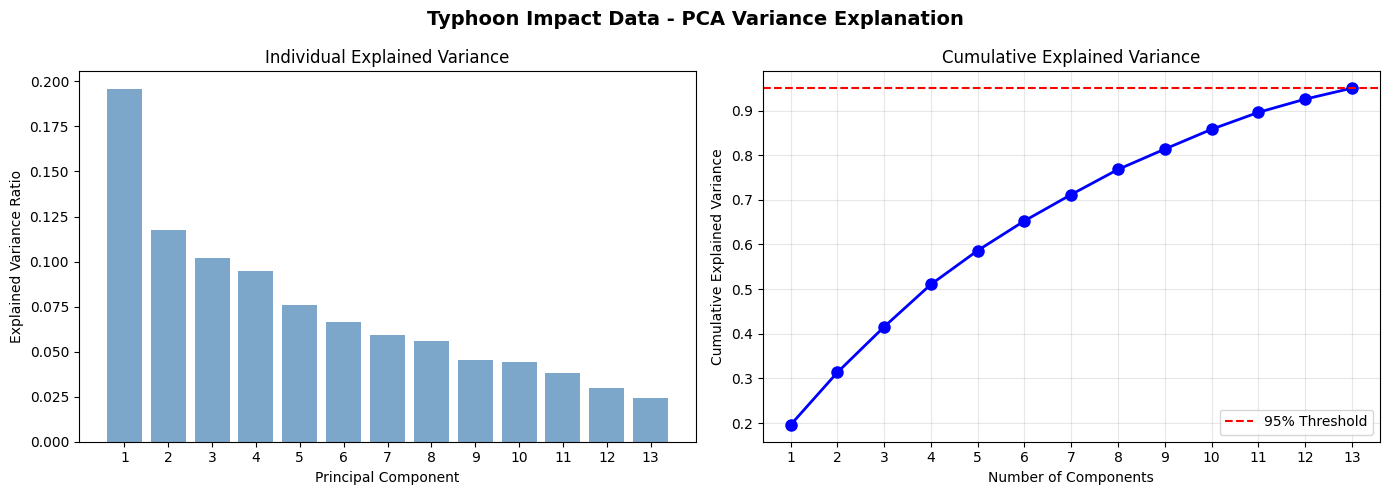

In [241]:
# Run PCA pipeline on typhoon impact data
typhoon_pca_results = run_complete_pca_pipeline(
    input_dataframe=df,
    n_components=None,  # Auto-determine based on variance threshold
    variance_threshold=0.95,
    categorical_columns=None,  # Include all columns (typhoon_type is now ordinal encoded)
    show_plots=True,
    return_loadings=True
)

In [242]:
# Access PCA results
typhoon_pca_df = typhoon_pca_results['pca_dataframe']

# Display explained variance information
print("=" * 60)
print("PCA EXPLAINED VARIANCE SUMMARY")
print("=" * 60)
print(f"Total samples: {len(typhoon_pca_df)}")
print(f"Number of PCA components: {typhoon_pca_df.shape[1]}")
print(f"Total variance explained: {typhoon_pca_results['total_variance_explained']*100:.2f}%")
print("\nVariance explained per component:")
for i, var in enumerate(typhoon_pca_results['explained_variance']):
    print(f"  PC{i+1}: {var*100:.2f}%")
print("=" * 60)

PCA EXPLAINED VARIANCE SUMMARY
Total samples: 1776
Number of PCA components: 13
Total variance explained: 95.02%

Variance explained per component:
  PC1: 19.58%
  PC2: 11.76%
  PC3: 10.22%
  PC4: 9.50%
  PC5: 7.59%
  PC6: 6.65%
  PC7: 5.90%
  PC8: 5.62%
  PC9: 4.56%
  PC10: 4.43%
  PC11: 3.79%
  PC12: 2.97%
  PC13: 2.45%


## Plotting 2D and 3D

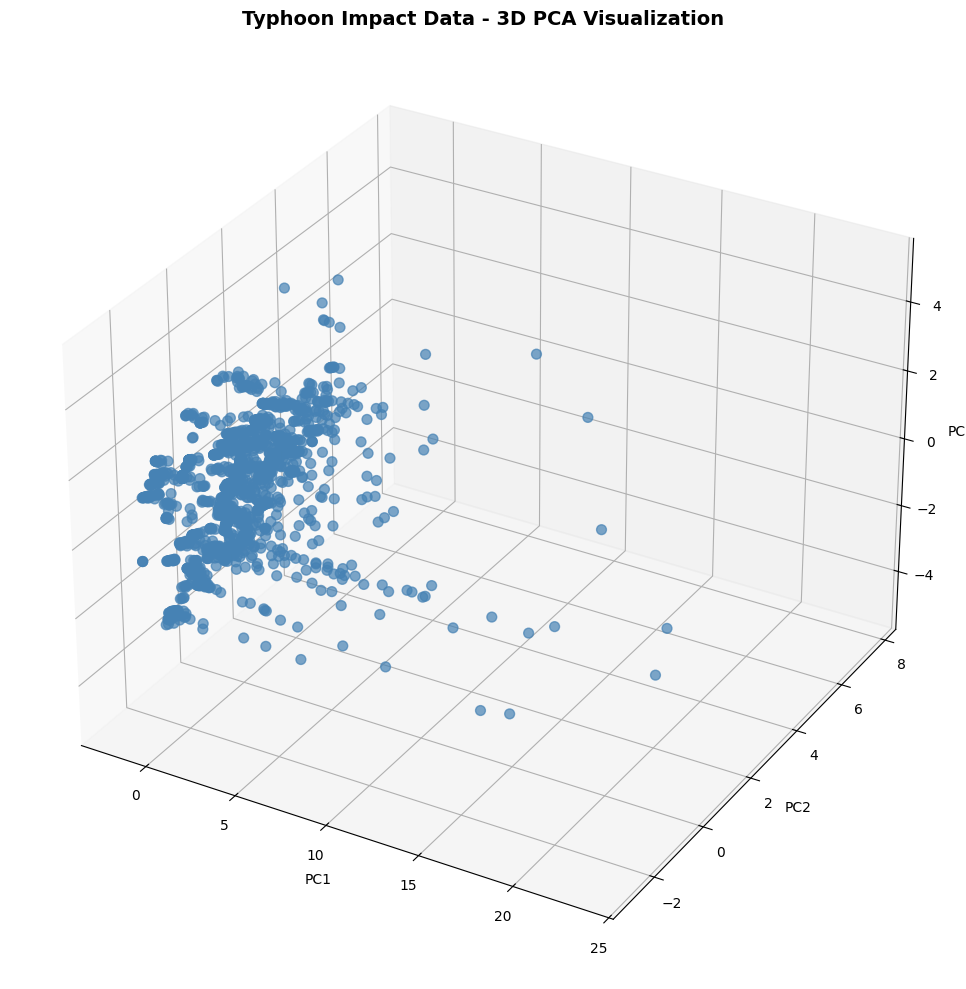

In [243]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_3d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 3D Visualization'
) -> None:
    """
    Create a 3D scatter plot of the first 3 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2, PC3)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 3D plot
    """
    pca_3d_fig = plt.figure(figsize=(12, 10))
    pca_3d_ax = pca_3d_fig.add_subplot(111, projection='3d')
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    pc3_values = pca_dataframe['PC3'].values
    
    if cluster_labels is not None:
        scatter_plot = pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_3d_fig.colorbar(scatter_plot, ax=pca_3d_ax, label='Cluster')
    else:
        pca_3d_ax.scatter(
            pc1_values, pc2_values, pc3_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_3d_ax.set_xlabel('PC1')
    pca_3d_ax.set_ylabel('PC2')
    pca_3d_ax.set_zlabel('PC3')
    pca_3d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_3d_fig)

# Plot 3D PCA visualization
plot_pca_3d(typhoon_pca_df, figure_title='Typhoon Impact Data - 3D PCA Visualization')

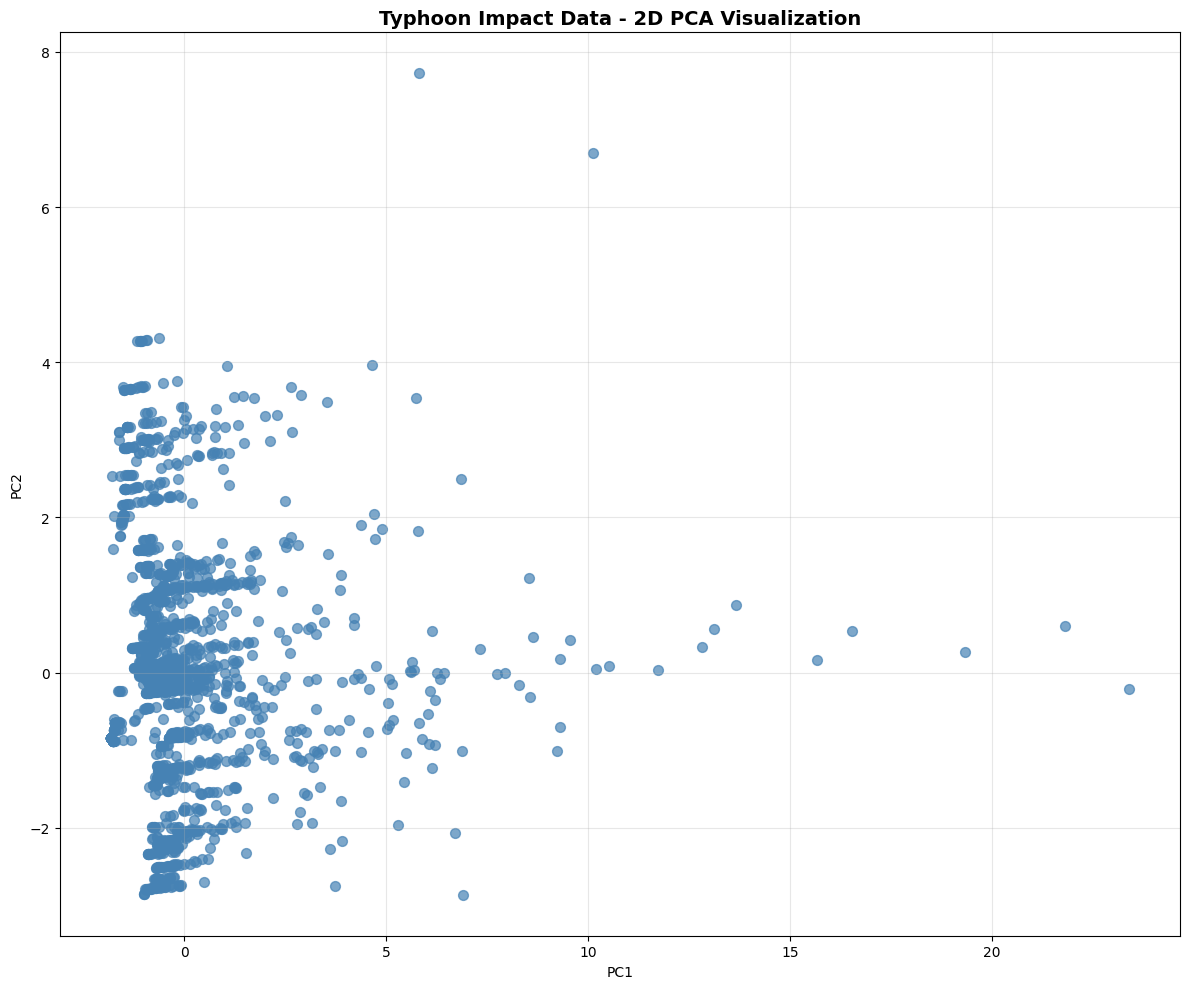

In [244]:
# 2D PCA Visualization
def plot_pca_2d(
    pca_dataframe: pd.DataFrame,
    cluster_labels: np.ndarray = None,
    figure_title: str = 'PCA 2D Visualization'
) -> None:
    """
    Create a 2D scatter plot of the first 2 PCA components.
    
    Parameters:
    -----------
    pca_dataframe : pd.DataFrame
        DataFrame containing PCA components (PC1, PC2)
    cluster_labels : np.ndarray, optional
        Cluster labels for coloring points
    figure_title : str
        Title for the 2D plot
    """
    pca_2d_fig, pca_2d_ax = plt.subplots(figsize=(12, 10))
    
    pc1_values = pca_dataframe['PC1'].values
    pc2_values = pca_dataframe['PC2'].values
    
    if cluster_labels is not None:
        scatter_plot_2d = pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c=cluster_labels, cmap='viridis', s=50, alpha=0.7
        )
        pca_2d_fig.colorbar(scatter_plot_2d, ax=pca_2d_ax, label='Cluster')
    else:
        pca_2d_ax.scatter(
            pc1_values, pc2_values,
            c='steelblue', s=50, alpha=0.7
        )
    
    pca_2d_ax.set_xlabel('PC1')
    pca_2d_ax.set_ylabel('PC2')
    pca_2d_ax.set_title(figure_title, fontsize=14, fontweight='bold')
    pca_2d_ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.close(pca_2d_fig)

# Plot 2D PCA visualization
plot_pca_2d(typhoon_pca_df, figure_title='Typhoon Impact Data - 2D PCA Visualization')

In [245]:
df.head()

,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0


## Standard Scaling of Sample Data

In [246]:
# Initialize StandardScaler
scaler = StandardScaler()

df_clean = df.copy()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_clean)

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

print("Original data (first 5 rows):")
display(df.head())
print("\nScaled data (first 5 rows):")
display(df_scaled.head())

Original data (first 5 rows):


,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,3608,11120,6,0,0,0,0,0,2646179.36,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
1,968,3028,5,0,0,0,0,0,494592.00,133.0,195,4,20.3,32.71,1000.5,6,1,0,0,0
2,444,1532,4,0,0,0,0,0,227328.00,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
3,575,1792,4,0,0,0,0,0,291082.96,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0
4,575,1955,6,0,0,0,0,0,296521.75,133.0,195,4,25.6,39.00,977.1,6,1,0,0,0



Scaled data (first 5 rows):


,families,person,brgy,dead,injured/ill,missing,totally,partially,cost,duration_in_par_hours,max_sustained_wind_kph,typhoon_type,max_24hr_rainfall_mm,total_storm_rainfall_mm,min_pressure_hpa,weather_records_found,region_2,region_3,region_5,region_8
0,0.627959,0.432912,-0.245512,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,1.833588,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
1,-0.096344,-0.147600,-0.332928,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,0.147222,0.422971,1.093216,1.133352,-1.173803,-1.226523,0.466233,0.309408,2.161972,-0.557406,-0.776459,-0.51649
2,-0.240108,-0.254921,-0.420344,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.062254,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
3,-0.204167,-0.236269,-0.420344,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.012284,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649
4,-0.204167,-0.224576,-0.245512,-0.04519,-0.121532,-0.050655,-0.140446,-0.198449,-0.008021,0.422971,1.093216,1.133352,-1.099347,-1.169851,-1.861117,0.309408,2.161972,-0.557406,-0.776459,-0.51649


In [247]:
from sklearn.cluster import DBSCAN
import numpy as np

# Try different eps values to get closer to 3 clusters
eps_values = [0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.2, 3.3, 4.6]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps={eps}: {n_clusters} clusters, {n_noise} noise points")

# Use eps=3.3 to get 3 clusters
dbscan = DBSCAN(eps=4.6, min_samples=3)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['dbscan_cluster'] = dbscan_labels

print(f"\nSelected: eps=3.3 with {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} clusters")

eps=0.3: 70 clusters, 822 noise points
eps=0.5: 70 clusters, 622 noise points
eps=0.7: 67 clusters, 448 noise points
eps=1.0: 50 clusters, 301 noise points
eps=1.5: 36 clusters, 202 noise points
eps=2.0: 20 clusters, 135 noise points
eps=3.2: 5 clusters, 69 noise points
eps=3.3: 3 clusters, 68 noise points
eps=1.0: 50 clusters, 301 noise points
eps=1.5: 36 clusters, 202 noise points
eps=2.0: 20 clusters, 135 noise points
eps=3.2: 5 clusters, 69 noise points
eps=3.3: 3 clusters, 68 noise points
eps=4.6: 3 clusters, 44 noise points

Selected: eps=3.3 with 5 clusters
eps=4.6: 3 clusters, 44 noise points

Selected: eps=3.3 with 5 clusters


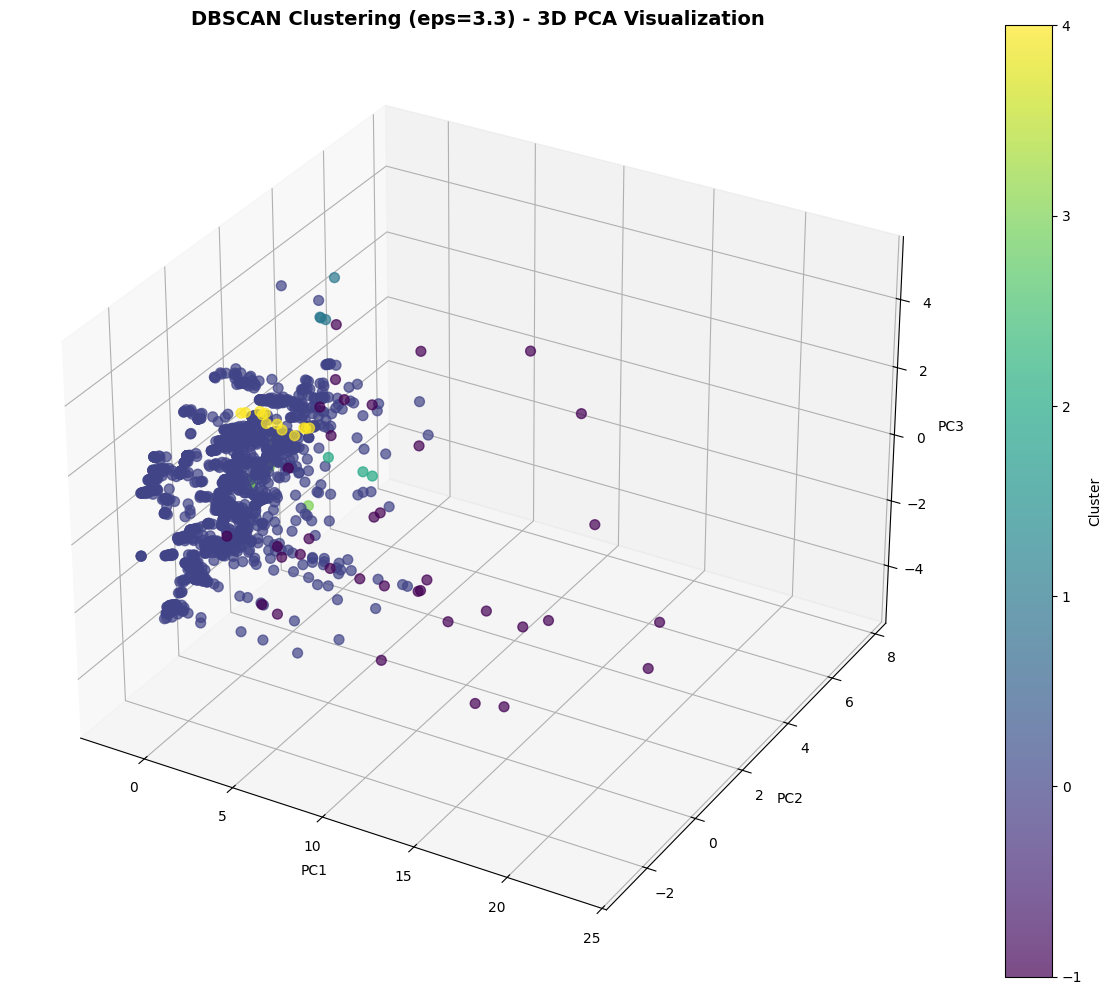

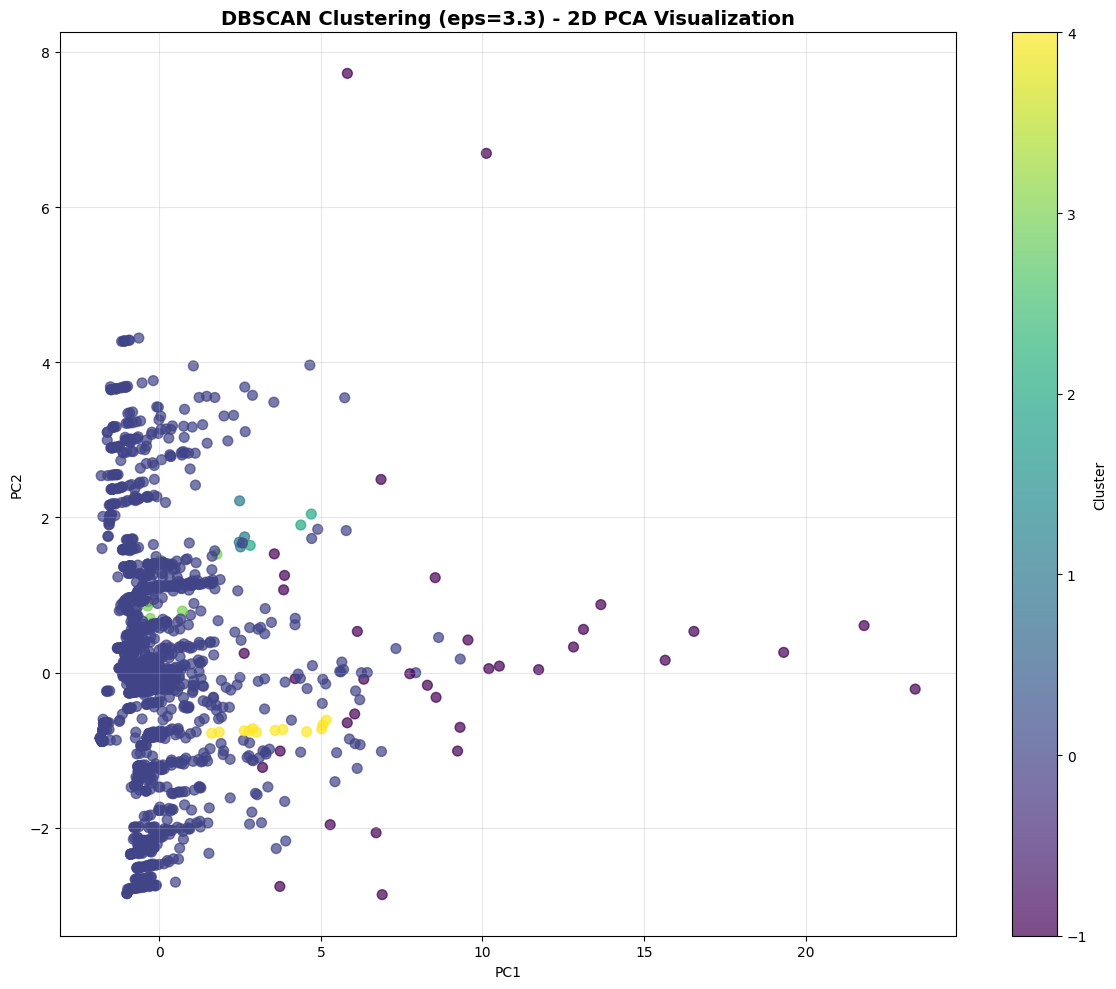


DBSCAN CLUSTERING RESULTS (eps=3.3) - ORIGINAL DATA

CLUSTER 0
Number of records: 1716


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
0,BETTY,2023,2,BATANES,BASCO,3608,11120,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
1,BETTY,2023,2,BATANES,ITBAYAT,968,3028,5,0,0,...,6/1/2023,133.0,195,STY,20.3,32.71,1000.5,1,6,6
2,BETTY,2023,2,BATANES,IVANA,444,1532,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
3,BETTY,2023,2,BATANES,MAHATAO,575,1792,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
4,BETTY,2023,2,BATANES,SABTANG,575,1955,6,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
5,BETTY,2023,2,BATANES,UYUGAN,433,1464,4,0,0,...,6/1/2023,133.0,195,STY,25.6,39.00,977.1,1,6,6
6,HENRY,2022,2,BATANES,BASCO,2,10,1,0,0,...,9/4/2022,80.2,195,STY,85.4,139.60,994.2,1,5,5
7,JENNY,2023,2,BATANES,BASCO,1,1,1,0,0,...,10/6/2023,146.7,175,TY,134.0,224.20,998.9,1,8,8
8,JENNY,2023,2,BATANES,ITBAYAT,6,20,2,0,0,...,10/6/2023,146.7,175,TY,273.0,355.80,1000.6,1,8,8
9,JENNY,2023,2,BATANES,SABTANG,0,139,4,0,0,...,10/6/2023,146.7,175,TY,134.0,224.20,998.9,1,8,8



CLUSTER 1
Number of records: 4


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
11,KIKO,2021,2,BATANES,ITBAYAT,977,2985,5,0,0,...,9/12/2021,116.0,215,STY,510.0,688.2,927.9,1,6,6
12,KIKO,2021,2,BATANES,IVANA,441,1609,4,0,3,...,9/12/2021,116.0,215,STY,420.7,604.9,927.9,1,6,6
13,KIKO,2021,2,BATANES,MAHATAO,517,1792,4,0,2,...,9/12/2021,116.0,215,STY,420.7,604.9,927.9,1,6,6
14,KIKO,2021,2,BATANES,SABTANG,575,1968,6,0,5,...,9/12/2021,116.0,215,STY,420.7,604.9,927.9,1,6,6



CLUSTER 2
Number of records: 3


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
64,MARING,2021,2,CAGAYAN,APARRI,5915,20505,20,0,0,...,10/12/2021,118.0,100,STS,138.4,227.31,981.4,1,6,6
72,MARING,2021,2,CAGAYAN,GONZAGA,1943,6357,21,0,0,...,10/12/2021,118.0,100,STS,138.4,227.31,981.4,1,6,6
83,MARING,2021,2,CAGAYAN,SANTA TERESITA,3009,14218,13,0,0,...,10/12/2021,118.0,100,STS,138.4,227.31,981.4,1,6,6



NOISE POINTS (Cluster -1)
Number of records: 36


,Typhoon Name,Year,Region,Province,City/Municipality,Families,Person,Brgy,Dead,Injured/Ill,...,PAR_END,Duration_in_PAR_Hours,Max_Sustained_Wind_kph,Typhoon_Type,Max_24hr_Rainfall_mm,Total_Storm_Rainfall_mm,Min_Pressure_hPa,Weather_Station_Mapped,Weather_Records_Found,Weather_Days_Covered
10,KIKO,2021,2,BATANES,BASCO,3043,10656,6,0,0,...,9/12/2021,116.0,215,STY,420.7,604.9,927.9,1,6,6
15,KIKO,2021,2,BATANES,UYUGAN,450,1558,4,0,17,...,9/12/2021,116.0,215,STY,420.7,604.9,927.9,1,6,6
333,KARDING,2022,3,AURORA,DINGALAN,4190,15079,11,0,23,...,9/26/2022,114.0,195,STY,55.8,73.3,996.4,1,5,5
460,KARDING,2022,3,BULACAN,SAN ILDEFONSO,13598,52112,11,0,13,...,9/26/2022,114.0,195,STY,55.8,73.3,996.4,1,5,5
462,KARDING,2022,3,BULACAN,SAN MIGUEL,52600,191170,9,5,1,...,9/26/2022,114.0,195,STY,55.8,73.3,996.4,1,5,5
510,KARDING,2022,3,NUEVA ECIJA,CABANATUAN CITY,60550,195016,18,0,4,...,9/26/2022,114.0,195,STY,55.8,73.3,996.4,1,5,5
515,KARDING,2022,3,NUEVA ECIJA,GAPAN CITY,25317,121601,3,0,8,...,9/26/2022,114.0,195,STY,55.8,73.3,996.4,1,5,5
831,ROLLY,2020,5,ALBAY,LEGAZPI CITY,20173,77148,60,0,0,...,11/3/2020,122.0,225,STY,166.7,287.9,981.0,1,6,6
835,ROLLY,2020,5,ALBAY,MALINAO,10570,38530,29,0,0,...,11/3/2020,122.0,225,STY,166.7,287.9,981.0,1,6,6
842,ROLLY,2020,5,ALBAY,TABACO CITY,38967,146134,47,0,0,...,11/3/2020,122.0,225,STY,166.7,287.9,981.0,1,6,6



CLUSTER SUMMARY
Noise: 36 records (2.03%)
Cluster 0: 1716 records (96.62%)
Cluster 1: 4 records (0.23%)
Cluster 2: 3 records (0.17%)


In [248]:
# 3D visualization of DBSCAN clusters
plot_pca_3d(
    pca_dataframe=typhoon_pca_df,
    cluster_labels=dbscan_labels,
    figure_title='DBSCAN Clustering (eps=3.3) - 3D PCA Visualization'
)

# 2D visualization of DBSCAN clusters
plot_pca_2d(
    pca_dataframe=typhoon_pca_df,
    cluster_labels=dbscan_labels,
    figure_title='DBSCAN Clustering (eps=3.3) - 2D PCA Visualization'
)

# Load original data for readable representation
original_df = pd.read_csv('../data/typhoon_impact_with_extreme_weather.csv')

# Add cluster labels to original data
original_df['dbscan_cluster'] = dbscan_labels

# Display data for each cluster (excluding noise points -1, showing only clusters 0, 1, 2)
print("\n" + "=" * 80)
print("DBSCAN CLUSTERING RESULTS (eps=3.3) - ORIGINAL DATA")
print("=" * 80)

for cluster_id in [0, 1, 2]:
    cluster_data = original_df[original_df['dbscan_cluster'] == cluster_id]
    
    print("\n" + "=" * 80)
    print(f"CLUSTER {cluster_id}")
    print(f"Number of records: {len(cluster_data)}")
    print("=" * 80)
    display(cluster_data.drop(columns=['dbscan_cluster']).head(10))

# Show noise points separately
noise_data = original_df[original_df['dbscan_cluster'] == -1]
print("\n" + "=" * 80)
print(f"NOISE POINTS (Cluster -1)")
print(f"Number of records: {len(noise_data)}")
print("=" * 80)
display(noise_data.drop(columns=['dbscan_cluster']).head(10))

# Summary statistics for each cluster
print("\n" + "=" * 80)
print("CLUSTER SUMMARY")
print("=" * 80)
for cluster_id in [-1, 0, 1, 2]:
    cluster_name = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise"
    count = len(original_df[original_df['dbscan_cluster'] == cluster_id])
    percentage = (count / len(original_df)) * 100
    print(f"{cluster_name}: {count} records ({percentage:.2f}%)")

In [249]:
import optuna
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    eps = trial.suggest_float("eps", 0.1, 5.0, step=0.1)
    min_samples = trial.suggest_int("min_samples", 3, 20)

    # Train DBSCAN with the suggested hyperparameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)

    # Count the number of clusters (excluding noise points)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # If the number of clusters is not 3, return a high loss value
    if n_clusters != 3:
        return float("inf")

    # Calculate the silhouette score (higher is better)
    if len(set(labels)) > 1:  # Ensure there is more than one cluster
        score = silhouette_score(df_scaled, labels)
    else:
        score = -1

    return -score  # Minimize the negative silhouette score

# Create an Optuna study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add the cluster labels to the dataframe
df["dbscan_cluster"] = dbscan_labels

[I 2025-12-04 11:34:34,411] A new study created in memory with name: no-name-3a5bedb2-9930-4955-9c6b-5f3de7df0f58
[I 2025-12-04 11:34:34,438] Trial 0 finished with value: inf and parameters: {'eps': 2.3000000000000003, 'min_samples': 12}. Best is trial 0 with value: inf.
[I 2025-12-04 11:34:34,438] Trial 0 finished with value: inf and parameters: {'eps': 2.3000000000000003, 'min_samples': 12}. Best is trial 0 with value: inf.
[I 2025-12-04 11:34:34,471] Trial 1 finished with value: inf and parameters: {'eps': 1.6, 'min_samples': 8}. Best is trial 0 with value: inf.
[I 2025-12-04 11:34:34,471] Trial 1 finished with value: inf and parameters: {'eps': 1.6, 'min_samples': 8}. Best is trial 0 with value: inf.
[I 2025-12-04 11:34:34,535] Trial 2 finished with value: inf and parameters: {'eps': 1.6, 'min_samples': 8}. Best is trial 0 with value: inf.
[I 2025-12-04 11:34:34,535] Trial 2 finished with value: inf and parameters: {'eps': 1.6, 'min_samples': 8}. Best is trial 0 with value: inf.
[I

Best hyperparameters: {'eps': 3.5000000000000004, 'min_samples': 7}
